In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


In [2]:
#Reading insurance dataset
insurancedata=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurancedata.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#one hot encoding for categorical variables
insurance_onehot=pd.get_dummies(insurancedata)
insurance_onehot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [4]:
#Create X and Y values
X=insurance_onehot.drop("charges",axis=1)
Y=insurance_onehot["charges"]

In [5]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [6]:
Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [7]:
#Creating training and test data sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=.20,random_state=42)
len(X),len(X_train),len(X_test)

(1338, 1070, 268)

In [8]:
X_train.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.95,2,1,0,1,0,0,1,0,0
1285,47,24.32,0,1,0,1,0,1,0,0,0
1142,52,24.86,0,1,0,1,0,0,0,1,0
969,39,34.32,5,1,0,1,0,0,0,1,0
486,54,21.47,3,1,0,1,0,0,1,0,0


In [9]:
y_train

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

In [10]:
tf.random_seed=42
#create the model
insurance_model=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
#Build the model
insurance_model.compile(loss=tf.keras.losses.mae,optimizer="sgd",metrics=["mae"])
#Fit the model
insurance_model.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 8655.3604 - mae: 8655.3604
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7895.0010 - mae: 7895.0010
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7609.6792 - mae: 7609.6792
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7603.7139 - mae: 7603.7139
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7490.6030 - mae: 7490.6030
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7486.0283 - mae: 7486.0283
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7557.5889 - mae: 7557.5889
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7628.9419 - mae: 7628.9419
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7730.1450 - mae: 7730.1450
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7444.8828 - mae: 7444.8828

In [11]:
#check the results of the model
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7814.5381 - mae: 7814.5381


[7814.5380859375, 7814.5380859375]

In [12]:
#improving the model
#Adding extra layer
 #Set random seed
tf.random.set_seed=42

#Create the model
insurance_model_2 =tf.keras.Sequential([
    
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Comple the model
insurance_model_2.compile(loss=tf.keras.losses.mae,optimizer="adam",metrics=["mae"])
#Fit the model
insurance_model_2.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13239.5566 - mae: 13239.5566
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13031.5498 - mae: 13031.5498
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12621.0107 - mae: 12621.0107
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 11866.9014 - mae: 11866.9014
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10680.8291 - mae: 10680.8291
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9254.6895 - mae: 9254.6895
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8048.5815 - mae: 8048.5815
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7525.7808 - mae: 7525.7808
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7431.5713 - mae: 7431.5713
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7411.9189 - mae:

In [13]:
insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4872.0791 - mae: 4872.0791


[4872.0791015625, 4872.0791015625]

In [14]:
# same mode as above try training for longner

# Set random seed
tf.random.set_seed=42

#Create Model

insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#Model Complie 

insurance_model_3.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(),metrics=["mae"])

#Fit the model

history=insurance_model_3.fit(X_train,y_train,epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13288.5137 - mae: 13288.5137
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13119.2705 - mae: 13119.2705
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12761.0977 - mae: 12761.0977
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12056.7139 - mae: 12056.7139
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 10887.3047 - mae: 10887.3047
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9424.8467 - mae: 9424.8467
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8120.7261 - mae: 8120.7261
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7521.1602 - mae: 7521.1602
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7423.0615 - mae: 7423.0615
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7399.4136 - mae:

In [15]:
insurance_model_3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3478.5220 - mae: 3478.5220


[3478.52197265625, 3478.52197265625]

Text(0.5, 0, 'epochs')

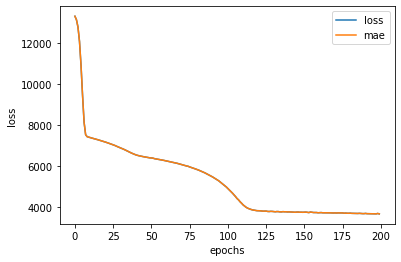

In [16]:
#Plot history("Also know as the training Curve")
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")